# **Bioinformatics Project - Computational Drug Discovery [Part 5] Comparing Regressors**

Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In Part 5, we will be comparing several ML algorithms for build regression models of acetylcholinesterase inhibitors.



## **1. Import libraries**

In [18]:
pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for click from https://files.pythonhosted.org/packages/00/2e/d53fa4befbf2cfa713304affc7ca780ce4fc1fd8710527771b58311a3229/click-8.1.7-py3-none-any.whl.metadata
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Obtaining dependency information for tqdm from https://files.pythonhosted.org/packages/00/e5/f12a80907d0884e6dff9c16d0c0114d81b8cd07dc3ae54c5e962cc83037e/tqdm-4.66.1-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ------- -------------------------------- 10.2/57.6 kB ? eta -:--:--
     -------------------- ----------------- 30.7/57.6 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 57.6/57.6 kB 607.3 kB/s eta 0:00:00
  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/74/02/5ad29a2a3d193a87d5a05fb7fd3b4e30b8eb6db7a9ddbe193beb7053978f/lightgbm-4.2.0-py3-none-win_amd64.whl.metadata
  Obtaining dependency information fo

In [19]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## **2. Load the data set**


In [5]:
df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [6]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

In [7]:
# Examine X dimension
X.shape

(4695, 881)

In [8]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(4695, 137)

In [11]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare ML algorithms**

In [20]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

  0%|          | 0/42 [00:00<?, ?it/s]

100%|██████████| 42/42 [00:40<00:00,  1.04it/s]


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001589 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 137
[LightGBM] [Info] Start training from score 5.814494
'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:35<00:00,  1.18it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002289 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 137
[LightGBM] [Info] Start training from score 5.814494


In [21]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.80,0.81,0.69,0.13
ExtraTreeRegressor,0.80,0.81,0.69,0.12
ExtraTreesRegressor,0.80,0.81,0.69,8.98
GaussianProcessRegressor,0.80,0.81,0.69,3.56
RandomForestRegressor,0.75,0.76,0.76,7.04
XGBRegressor,0.74,0.75,0.77,0.21
BaggingRegressor,0.72,0.73,0.80,0.79
MLPRegressor,0.69,0.70,0.85,3.54
HistGradientBoostingRegressor,0.55,0.57,1.02,1.31


In [22]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.27,0.38,1.22,1.28
LGBMRegressor,0.25,0.36,1.24,0.18
RandomForestRegressor,0.25,0.36,1.25,6.97
NuSVR,0.22,0.33,1.27,0.97
SVR,0.21,0.33,1.28,1.25
BaggingRegressor,0.20,0.32,1.28,0.74
GradientBoostingRegressor,0.18,0.30,1.30,1.23
XGBRegressor,0.18,0.30,1.30,0.14
KNeighborsRegressor,0.15,0.27,1.32,0.05


## **5. Data visualization of model performance**

[(0.0, 1.0)]

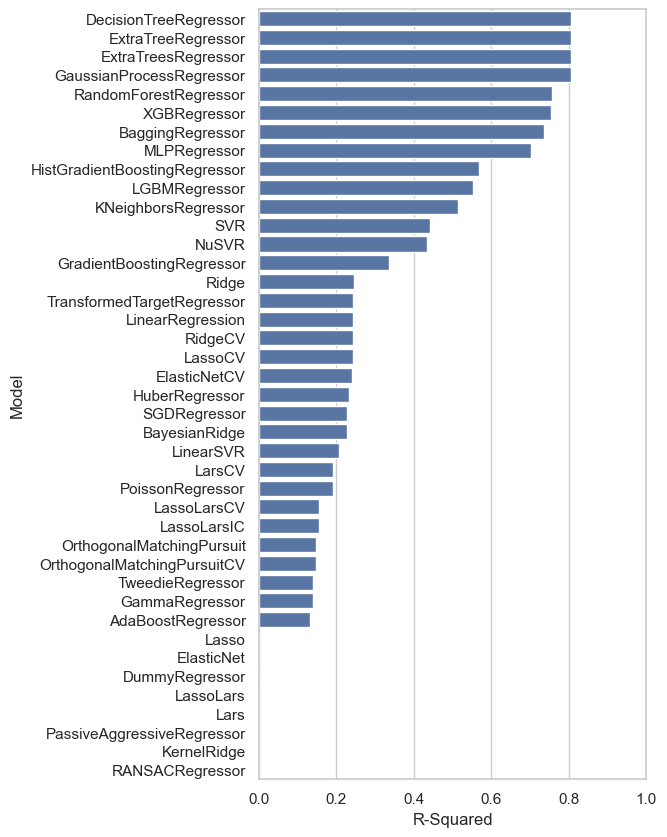

In [23]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

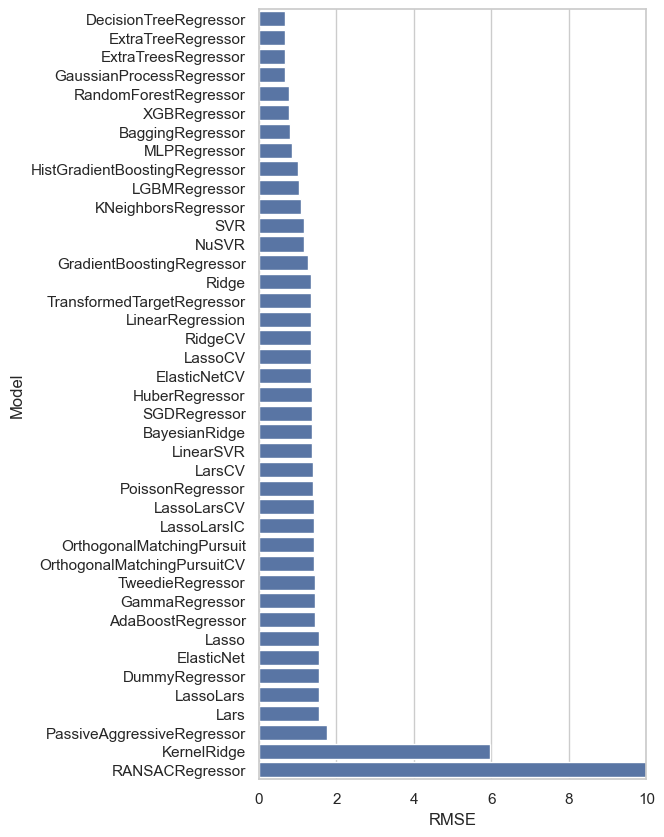

In [24]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

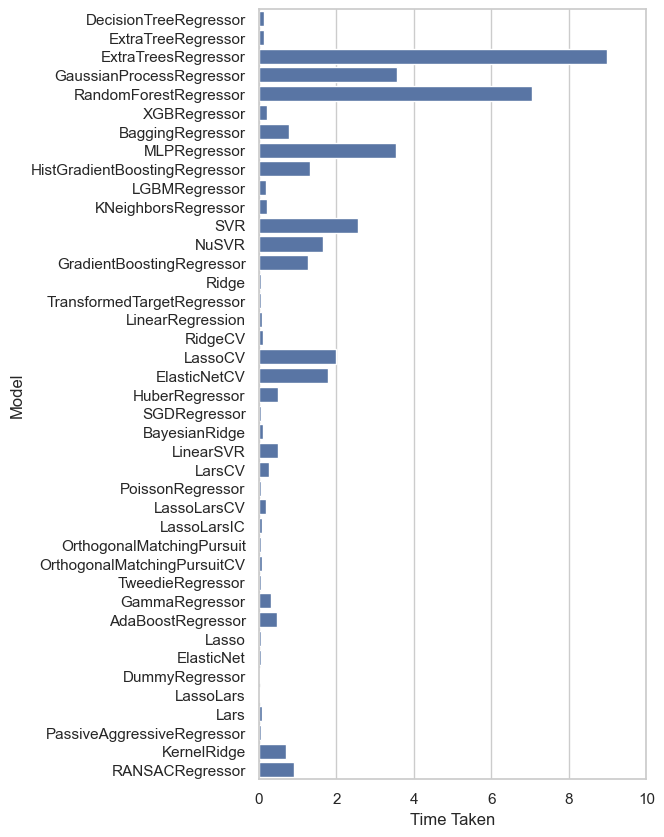

In [25]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))